### Basic information about the dataset

In [72]:
file_path = r"C:\Users\YourUsername\Downloads\heart.xls"


In [73]:
import os
import pandas as pd

# Get user's Downloads path dynamically
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# Full path to the CSV file
file_path = os.path.join(downloads_path, "heart.csv")

# Load the CSV into a DataFrame
dt = pd.read_csv(file_path)

# Show the first few rows
print("First 5 rows:")
display(dt.head())

# Dataset shape
print("\nShape:", dt.shape)

# Column names
print("\nColumns:", dt.columns.tolist())

# Data types and non-null counts
print("\nInfo:")
dt.info()

# Summary statistics
print("\nSummary stats:")
display(dt.describe())

# Missing values
print("\nMissing values:")
print(dt.isnull().sum())

# Target column value counts (if it exists)
if 'target' in dt.columns:
    print("\nTarget variable distribution:")
    print(dt['target'].value_counts())


First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Shape: (918, 12)

Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Summary stats

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Figure 1  to make pie chart


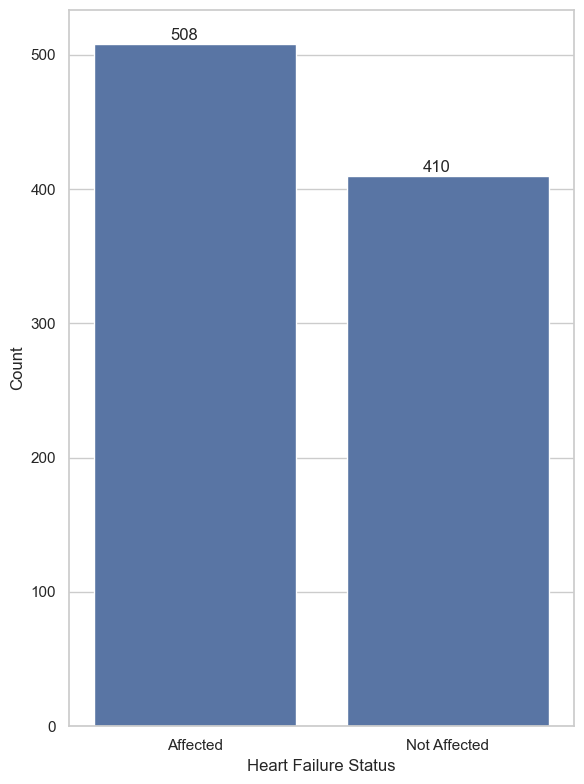

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Replace 1/0 with "Affected"/"Not Affected"
dt['HeartFailureStatus'] = dt['HeartDisease'].replace({1: 'Affected', 0: 'Not Affected'})

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8))
ax = sns.countplot(x='HeartFailureStatus', data=dt, order=['Affected', 'Not Affected'])
ax.set(xlabel="Heart Failure Status", ylabel="Count")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 3))

plt.tight_layout()
plt.show()


## Figure: 2  less than 90

In [82]:
import numpy as np
import pandas as pd

# Bin width for RestingBP
bin_width_bp = 10
min_bp = int(dt['RestingBP'].min() // bin_width_bp * bin_width_bp)
max_bp = int(dt['RestingBP'].max() // bin_width_bp * bin_width_bp + bin_width_bp)

# Create bins and labels
bins_bp = np.arange(min_bp, max_bp + bin_width_bp, bin_width_bp)
labels_bp = [f"{i}-{i + bin_width_bp - 1}" for i in bins_bp[:-1]]

# Add binned column to DataFrame
dt['RestingBP_Range'] = pd.cut(dt['RestingBP'], bins=bins_bp, labels=labels_bp, include_lowest=True, right=False)

# Ensure HeartDisease is integer type
dt['HeartDisease'] = dt['HeartDisease'].astype(int)

# Grouped counts
restingbp_counts = dt.groupby(['RestingBP_Range', 'HeartDisease']).size().unstack(fill_value=0)
restingbp_counts.columns = ['Not Affected', 'Affected']

# Add total column
restingbp_counts['Total'] = restingbp_counts.sum(axis=1)

# Reset index to display as regular table
restingbp_counts = restingbp_counts.reset_index()

# Display the final table
print(restingbp_counts)


   RestingBP_Range  Not Affected  Affected  Total
0              0-9             0         1      1
1            10-19             0         0      0
2            20-29             0         0      0
3            30-39             0         0      0
4            40-49             0         0      0
5            50-59             0         0      0
6            60-69             0         0      0
7            70-79             0         0      0
8            80-89             1         0      1
9            90-99             3         8     11
10         100-109            24        17     41
11         110-119            45        62    107
12         120-129           108       106    214
13         130-139           107       109    216
14         140-149            61        94    155
15         150-159            33        46     79
16         160-169            16        37     53
17         170-179             5        15     20
18         180-189             6         7     13


C:\TEMP1\ipykernel_7404\3187574193.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restingbp_counts = dt.groupby(['RestingBP_Range', 'HeartDisease']).size().unstack(fill_value=0)


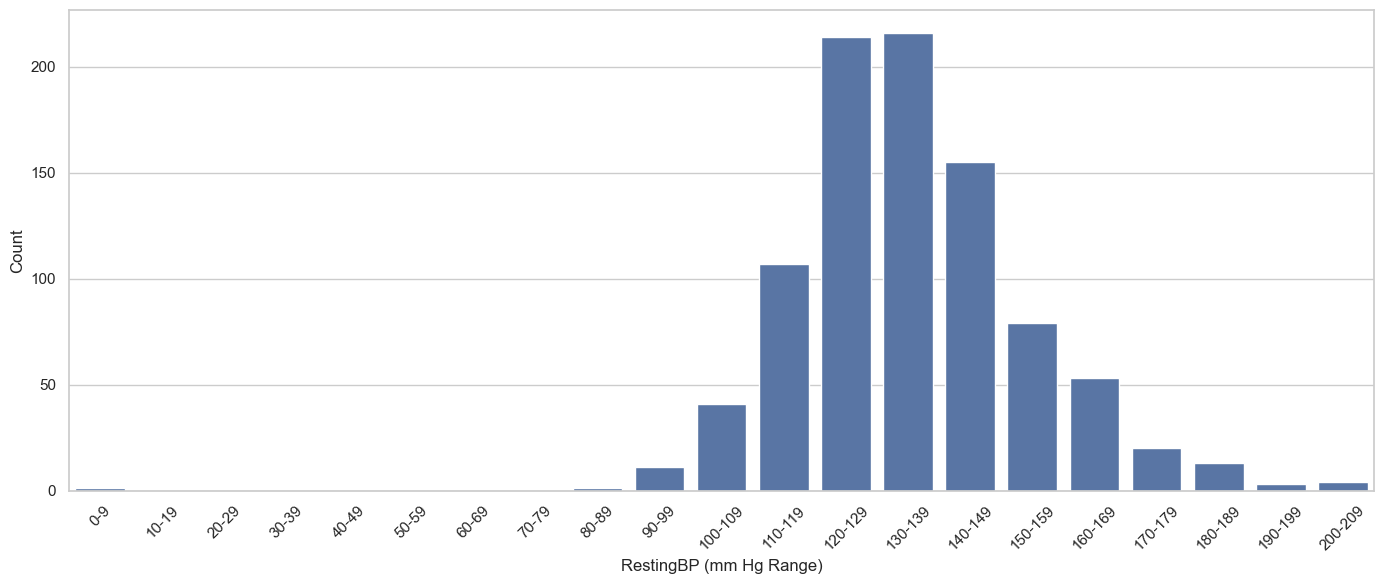

In [83]:
# Plot
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='RestingBP_Range', data=dt, order=labels_bp, color='#4c72b0')
ax.set(xlabel="RestingBP (mm Hg Range)", ylabel="Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [84]:
import numpy as np
import pandas as pd

# Ensure HeartDisease is numeric
dt['HeartDisease'] = pd.to_numeric(dt['HeartDisease'], errors='coerce')
dt = dt.dropna(subset=['HeartDisease'])

# Set a minimum and maximum for binning safely
min_val = 0
max_val = int(np.ceil(dt['RestingBP'].max() / 10) * 10)  # round up to nearest 10

# Create bin edges
bin_edges = [min_val] + list(np.arange(90, max_val + 10, 10))
bin_edges = sorted(set(bin_edges))  # remove any duplicates

# Create labels
bin_labels = ['<90'] + [f"{i}-{i + 9}" for i in bin_edges[1:-1]]

# Bin RestingBP
dt['RestingBP_Range'] = pd.cut(
    dt['RestingBP'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)

# Group and summarize
restingbp_counts = dt.groupby(['RestingBP_Range', 'HeartDisease'], observed=True).size().unstack(fill_value=0)
restingbp_counts.columns = ['Not Affected', 'Affected']
restingbp_counts['Total'] = restingbp_counts.sum(axis=1)
restingbp_counts['% Affected'] = (restingbp_counts['Affected'] / restingbp_counts['Total'] * 100).round(1)
restingbp_counts = restingbp_counts.reset_index()

print(restingbp_counts)


   RestingBP_Range  Not Affected  Affected  Total  % Affected
0              <90             1         1      2        50.0
1            90-99             3         8     11        72.7
2          100-109            24        17     41        41.5
3          110-119            45        62    107        57.9
4          120-129           108       106    214        49.5
5          130-139           107       109    216        50.5
6          140-149            61        94    155        60.6
7          150-159            33        46     79        58.2
8          160-169            16        37     53        69.8
9          170-179             5        15     20        75.0
10         180-189             6         7     13        53.8
11         190-199             1         2      3        66.7


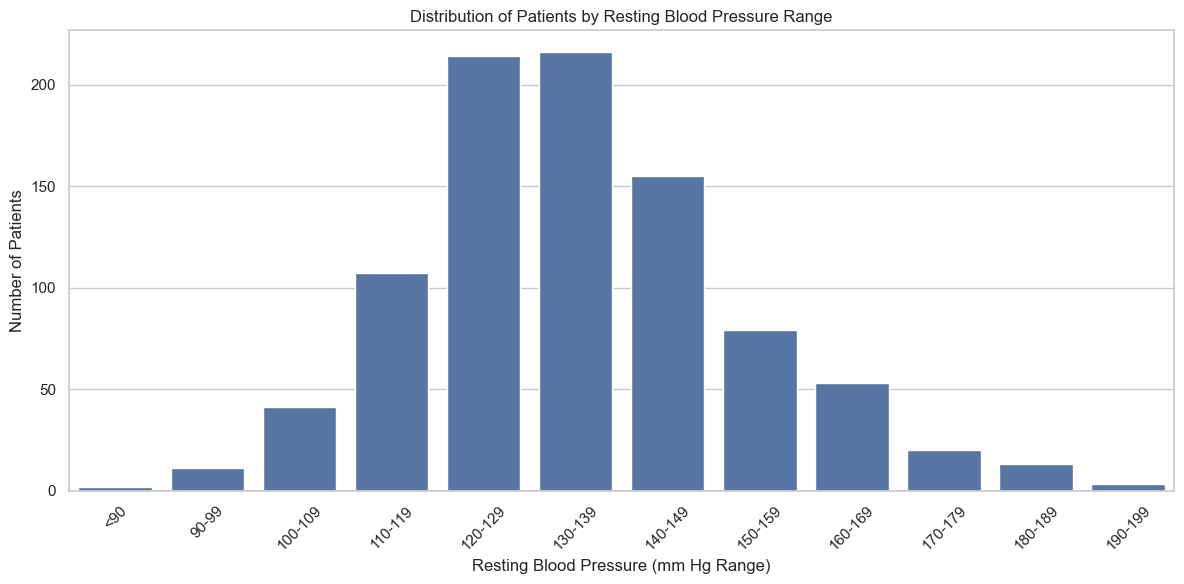

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Define correct label order for plotting
labels_bp = restingbp_counts['RestingBP_Range'].astype(str).tolist()

# Plot count of patients per RestingBP range
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='RestingBP_Range', data=dt, order=labels_bp, color='#4c72b0')
ax.set(xlabel="Resting Blood Pressure (mm Hg Range)", ylabel="Number of Patients")
plt.xticks(rotation=45)
plt.title("Distribution of Patients by Resting Blood Pressure Range")
plt.tight_layout()
plt.show()


## Figure: 3

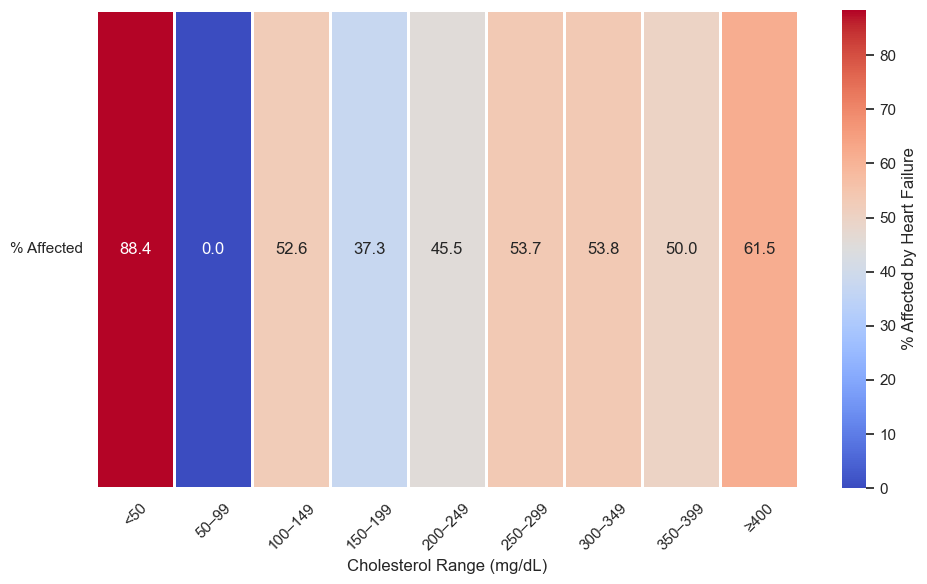

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels for cholesterol ranges
cholesterol_bins = [-1, 49, 99, 149, 199, 249, 299, 349, 399, 649]
cholesterol_labels = ['<50', '50–99', '100–149', '150–199', '200–249',
                      '250–299', '300–349', '350–399', '≥400']

# Apply binning to cholesterol column
dt['Cholesterol_Binned'] = pd.cut(
    dt['Cholesterol'],
    bins=cholesterol_bins,
    labels=cholesterol_labels
)

# Group by new bins and heart failure status (0 = not affected, 1 = affected)
cholesterol_hf = (
    dt.groupby(['Cholesterol_Binned', 'HeartDisease'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Rename columns
cholesterol_hf.columns = ['Not Affected', 'Affected']

# Calculate percentage affected in each cholesterol range
cholesterol_hf['% Affected'] = (
    cholesterol_hf['Affected'] / cholesterol_hf.sum(axis=1) * 100
)

# Plot heatmap to show % affected across cholesterol ranges
plt.figure(figsize=(10, 6))
sns.heatmap(
    cholesterol_hf[['% Affected']].T,
    annot=True, fmt=".1f", cmap="coolwarm",
    linewidths=1,
    cbar_kws={"label": "% Affected by Heart Failure"}
)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Cholesterol Range (mg/dL)")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [43]:
# Group and count by bin and heart failure status
cholesterol_summary = (
    dt.groupby(['Cholesterol_Binned', 'HeartDisease'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Rename for clarity
cholesterol_summary.columns = ['Not Affected', 'Affected']

# Add total and percentage affected columns
cholesterol_summary['Total'] = cholesterol_summary['Not Affected'] + cholesterol_summary['Affected']
cholesterol_summary['% Affected'] = (cholesterol_summary['Affected'] / cholesterol_summary['Total'] * 100).round(1)

# Display the table
print(cholesterol_summary)


                    Not Affected  Affected  Total  % Affected
Cholesterol_Binned                                           
<50                           20       152    172        88.4
50–99                          1         0      1         0.0
100–149                        9        10     19        52.6
150–199                       79        47    126        37.3
200–249                      158       132    290        45.5
250–299                       95       110    205        53.7
300–349                       36        42     78        53.8
350–399                        7         7     14        50.0
≥400                           5         8     13        61.5


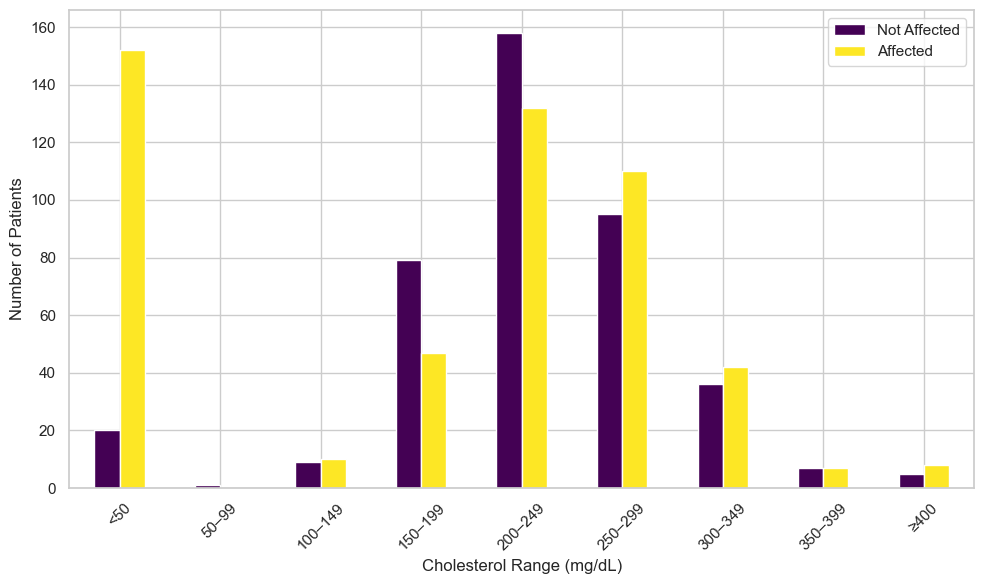

In [44]:
cholesterol_summary[['Not Affected', 'Affected']].plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    colormap='viridis'
)
plt.xlabel("Cholesterol Range (mg/dL)")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# final

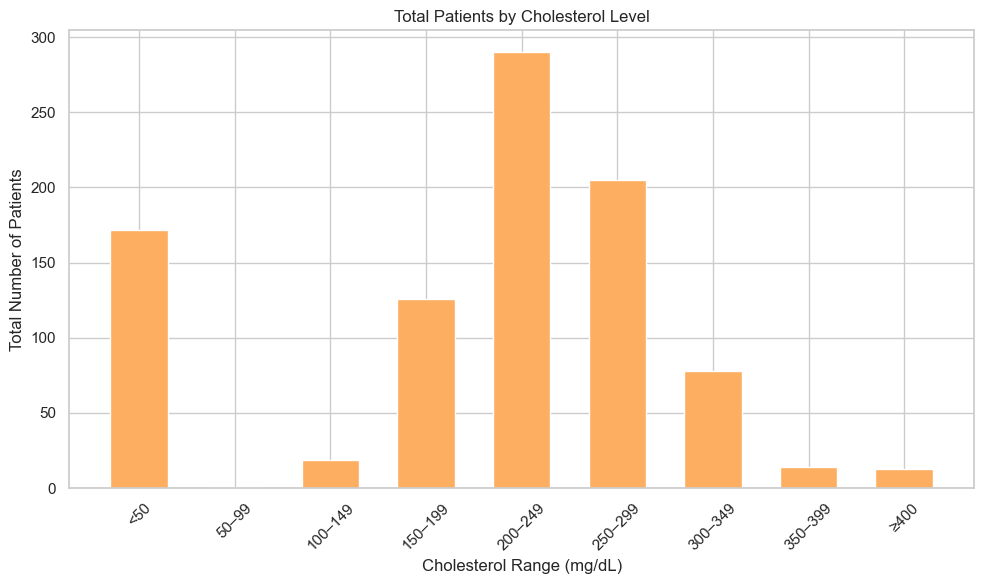

In [45]:
import matplotlib.pyplot as plt

# Add a 'Total' column to cholesterol_summary
cholesterol_summary['Total'] = cholesterol_summary['Not Affected'] + cholesterol_summary['Affected']

# Plot total counts only
plt.figure(figsize=(10, 6))
plt.bar(cholesterol_summary.index, cholesterol_summary['Total'], color='#fdae61', width=0.6)

plt.xlabel("Cholesterol Range (mg/dL)")
plt.ylabel("Total Number of Patients")
plt.title("Total Patients by Cholesterol Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Figure 4

In [46]:
# Define bins and labels for MaxHR
maxhr_bins = [0, 100, 150, 200, 250, 300]
maxhr_labels = ['≤100', '101–150', '151–200', '201–250', '>250']

# Bin MaxHR
dt['MaxHR_Binned'] = pd.cut(dt['MaxHR'], bins=maxhr_bins, labels=maxhr_labels, include_lowest=True)

# Group by MaxHR bin and HeartDisease status
maxhr_counts = dt.groupby(['MaxHR_Binned', 'HeartDisease']).size().unstack(fill_value=0)
maxhr_counts.columns = ['Not Affected', 'Affected']
maxhr_counts['Total'] = maxhr_counts.sum(axis=1)
maxhr_counts = maxhr_counts.reset_index()

# Display table
print(maxhr_counts)


  MaxHR_Binned  Not Affected  Affected  Total
0         ≤100            18        67     85
1      101–150           194       361    555
2      151–200           197        80    277
3      201–250             1         0      1
4         >250             0         0      0


C:\TEMP1\ipykernel_7404\2680008129.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  maxhr_counts = dt.groupby(['MaxHR_Binned', 'HeartDisease']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

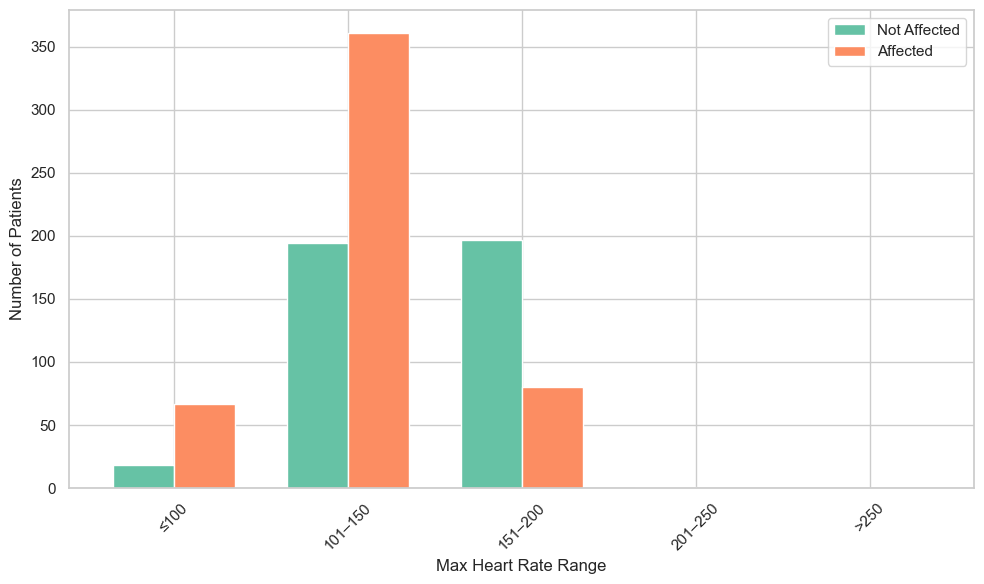

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot side-by-side bars
plt.figure(figsize=(10, 6))
ax = maxhr_counts.set_index('MaxHR_Binned')[['Not Affected', 'Affected']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['#66c2a5', '#fc8d62'],
    width=0.7
)

plt.xlabel("Max Heart Rate Range")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title='')
plt.tight_layout()
plt.show()

#final


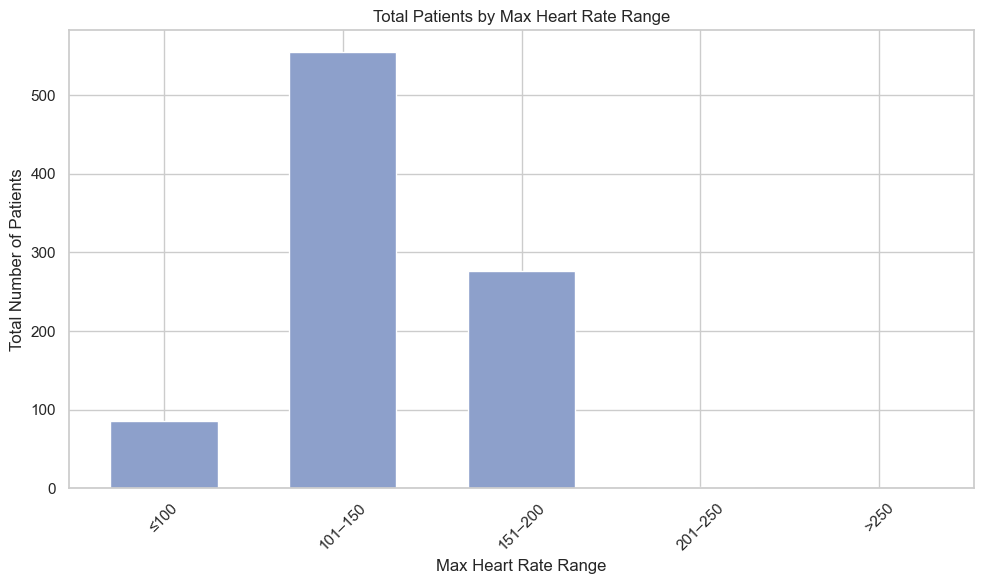

In [48]:
import matplotlib.pyplot as plt

maxhr_counts['Total'] = maxhr_counts['Affected'] + maxhr_counts['Not Affected']

# Plot total counts only
plt.figure(figsize=(10, 6))
plt.bar(maxhr_counts['MaxHR_Binned'], maxhr_counts['Total'], color='#8da0cb', width=0.6)

plt.xlabel("Max Heart Rate Range")
plt.ylabel("Total Number of Patients")
plt.title("Total Patients by Max Heart Rate Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Feature analysis

In [49]:
import pandas as pd

# Create new columns indicating presence of each risk factor
dt['RF_ExerciseAngina'] = (dt['ExerciseAngina'] == 'Y').astype(int)
dt['RF_ST_Slope'] = (dt['ST_Slope'] == 'Flat').astype(int)
dt['RF_Oldpeak'] = (dt['Oldpeak'] > 1.5).astype(int)

# Total risk factor count
dt['Risk_Factor_Count'] = (
    dt['RF_ExerciseAngina'] +
    dt['RF_ST_Slope'] +
    dt['RF_Oldpeak']
)

# Group by risk factor count and heart disease status
risk_summary = dt.groupby('Risk_Factor_Count')['HeartDisease'].value_counts().unstack().fillna(0)
risk_summary.columns = ['Not Affected', 'Affected']
risk_summary['% Affected'] = (risk_summary['Affected'] / risk_summary.sum(axis=1) * 100).round(1)

# Display the summary table
print(risk_summary)


                   Not Affected  Affected  % Affected
Risk_Factor_Count                                    
0                           288        42        12.7
1                            79       152        65.8
2                            38       211        84.7
3                             5       103        95.4


C:\TEMP1\ipykernel_7404\728768312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


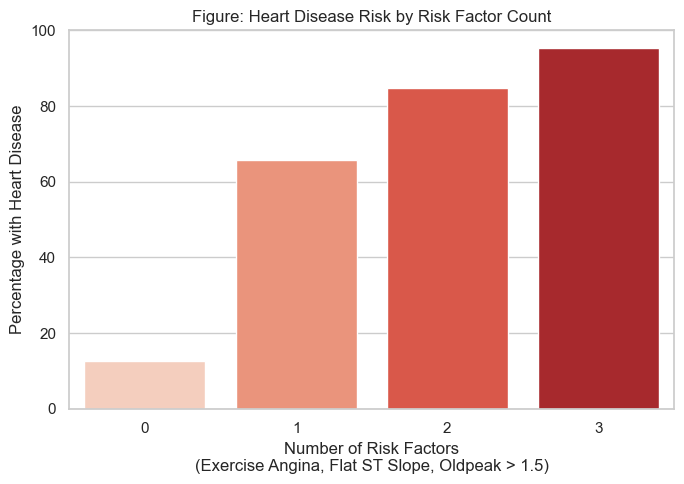

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'risk_summary' is the table created earlier
plt.figure(figsize=(7, 5))
sns.barplot(
    x=risk_summary.index,
    y=risk_summary['% Affected'],
    palette='Reds'
)

plt.ylabel("Percentage with Heart Disease")
plt.xlabel("Number of Risk Factors\n(Exercise Angina, Flat ST Slope, Oldpeak > 1.5)")
plt.title("Figure: Heart Disease Risk by Risk Factor Count")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [51]:
# Define risk factors
dt['RF_HighChol'] = dt['Cholesterol'] >= 240
dt['RF_HighBP'] = dt['RestingBP'] >= 140
dt['RF_Oldpeak'] = dt['Oldpeak'] > 1.0
dt['RF_Angina'] = dt['ExerciseAngina'] == 'Y'
dt['RF_FlatSlope'] = dt['ST_Slope'] == 'Flat'

# Count total number of risk factors per patient
dt['Risk_Factor_Count'] = dt[['RF_HighChol', 'RF_HighBP', 'RF_Oldpeak', 'RF_Angina', 'RF_FlatSlope']].sum(axis=1)

# Group by number of risk factors and heart disease status
risk_counts = dt.groupby(['Risk_Factor_Count', 'HeartDisease']).size().unstack(fill_value=0)
risk_counts.columns = ['Not Affected', 'Affected']
risk_counts['% Affected'] = (risk_counts['Affected'] / (risk_counts['Not Affected'] + risk_counts['Affected']) * 100).round(1)

# Display the table
print(risk_counts)


                   Not Affected  Affected  % Affected
Risk_Factor_Count                                    
0                           121        19        13.6
1                           144        72        33.3
2                            99       136        57.9
3                            35       149        81.0
4                            10        89        89.9
5                             1        43        97.7


C:\TEMP1\ipykernel_7404\1740325849.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


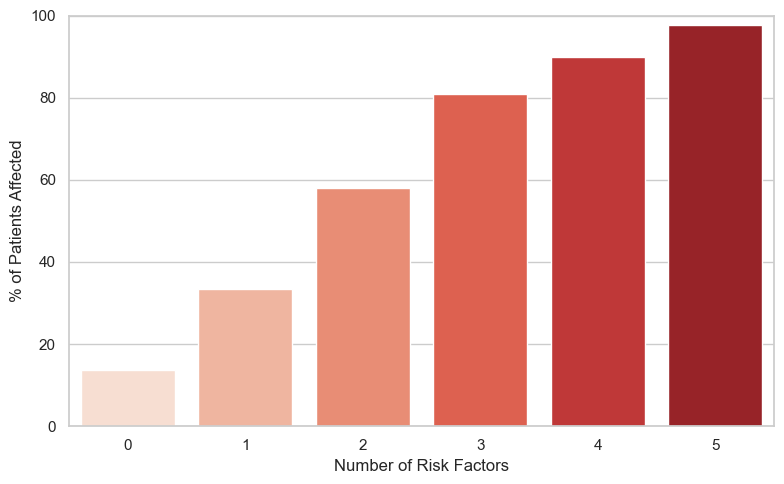

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
risk_plot = risk_counts.reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=risk_plot,
    x='Risk_Factor_Count',
    y='% Affected',
    palette='Reds'
)

plt.ylabel("% of Patients Affected")
plt.xlabel("Number of Risk Factors")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [53]:
# Create binary risk flags
dt['risk_oldpeak'] = (dt['Oldpeak'] > 1.0).astype(int)
dt['risk_angina'] = (dt['ExerciseAngina'] == 'Y').astype(int)
dt['risk_slope'] = (dt['ST_Slope'] == 'Flat').astype(int)
dt['risk_chol'] = (dt['Cholesterol'] >= 240).astype(int)
dt['risk_bp'] = (dt['RestingBP'] >= 140).astype(int)

# Total number of risk factors for each patient
dt['Risk_Factor_Count'] = dt[
    ['risk_oldpeak', 'risk_angina', 'risk_slope', 'risk_chol', 'risk_bp']
].sum(axis=1)

# Create matrix-style summary: how many affected vs not at each risk level
risk_matrix = dt.groupby(['Risk_Factor_Count', 'HeartDisease']).size().unstack(fill_value=0)
risk_matrix.columns = ['Not Affected', 'Affected']
risk_matrix['% Affected'] = (risk_matrix['Affected'] / risk_matrix.sum(axis=1) * 100).round(1)

# Reset index for clarity
risk_matrix = risk_matrix.reset_index()
print(risk_matrix)


   Risk_Factor_Count  Not Affected  Affected  % Affected
0                  0           121        19        13.6
1                  1           144        72        33.3
2                  2            99       136        57.9
3                  3            35       149        81.0
4                  4            10        89        89.9
5                  5             1        43        97.7


In [54]:
dt['risk_oldpeak'] = (dt['Oldpeak'] > 1.0).astype(int)
dt['risk_angina'] = (dt['ExerciseAngina'] == 'Y').astype(int)
dt['risk_slope'] = (dt['ST_Slope'] == 'Flat').astype(int)
dt['risk_chol'] = (dt['Cholesterol'] >= 240).astype(int)
dt['risk_bp'] = (dt['RestingBP'] >= 140).astype(int)


   Risk_Factor_Count  Not_Affected  Affected  % Affected
0                  0           207        12         5.5
1                  1           121        58        32.4
2                  2            56       115        67.3
3                  3            18       172        90.5
4                  4             7       128        94.8
5                  5             1        23        95.8


C:\TEMP1\ipykernel_7404\2788193227.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_summary, x='Risk_Factor_Count', y='% Affected', palette='coolwarm')


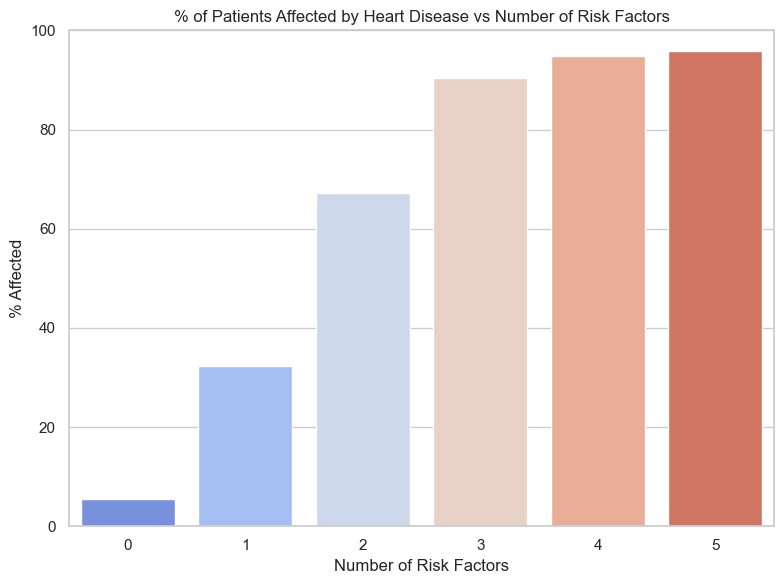

In [55]:
import pandas as pd
import numpy as np

# Copy dataset
df = dt.copy()

# Binning continuous features
df['Oldpeak_Bin'] = pd.cut(df['Oldpeak'], bins=[-1, 0, 2, 6.5], labels=['Low', 'Medium', 'High'])
df['MaxHR_Bin'] = pd.cut(df['MaxHR'], bins=[0, 120, 150, 250], labels=['Low', 'Medium', 'High'])

# Define high-risk values based on clinical insight and correlation
df['Risk_ExerciseAngina'] = (df['ExerciseAngina'] == 'Y').astype(int)
df['Risk_ST_Slope'] = (df['ST_Slope'] != 'Up').astype(int)  # Flat/Down = risky
df['Risk_Oldpeak'] = (df['Oldpeak_Bin'] == 'High').astype(int)
df['Risk_ChestPain'] = (df['ChestPainType'] == 'ASY').astype(int)
df['Risk_MaxHR'] = (df['MaxHR_Bin'] == 'Low').astype(int)


# Sum total risk factors for each patient
df['Risk_Factor_Count'] = df[[
    'Risk_ExerciseAngina', 'Risk_ST_Slope', 'Risk_Oldpeak',
    'Risk_ChestPain', 'Risk_MaxHR'
]].sum(axis=1)

# Group by number of risk factors and calculate affected percentage
risk_summary = df.groupby('Risk_Factor_Count')['HeartDisease'].agg(
    Not_Affected=lambda x: (x == 0).sum(),
    Affected=lambda x: (x == 1).sum()
).reset_index()

# Calculate percentage
risk_summary['% Affected'] = (risk_summary['Affected'] / 
                              (risk_summary['Affected'] + risk_summary['Not_Affected']) * 100).round(1)

# Display summary
print(risk_summary)

# Optional: Plot it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=risk_summary, x='Risk_Factor_Count', y='% Affected', palette='coolwarm')
plt.title('% of Patients Affected by Heart Disease vs Number of Risk Factors')
plt.ylabel('% Affected')
plt.xlabel('Number of Risk Factors')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


## Figure: 5


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and labels for Oldpeak
oldpeak_bins = [-0.1, 0, 1.0, 2.0, 3.0, 4.0, dt['Oldpeak'].max() + 1]
oldpeak_labels = ['0', '0.1–1.0', '1.1–2.0', '2.1–3.0', '3.1–4.0', '>4.0']

# Bin the Oldpeak column
dt['Oldpeak_Binned'] = pd.cut(dt['Oldpeak'], bins=oldpeak_bins, labels=oldpeak_labels, include_lowest=True)

# Group by bin and heart failure status (with observed=False to suppress the warning)
oldpeak_counts = dt.groupby(['Oldpeak_Binned', 'HeartDisease'], observed=False).size().unstack(fill_value=0)

# Rename columns and compute total
oldpeak_counts.columns = ['Not Affected', 'Affected']
oldpeak_counts['Total'] = oldpeak_counts.sum(axis=1)

# Display the result
print(oldpeak_counts)


                Not Affected  Affected  Total
Oldpeak_Binned                               
0                        246       124    370
0.1–1.0                   98       106    204
1.1–2.0                   55       178    233
2.1–3.0                    7        65     72
3.1–4.0                    1        21     22
>4.0                       1         5      6


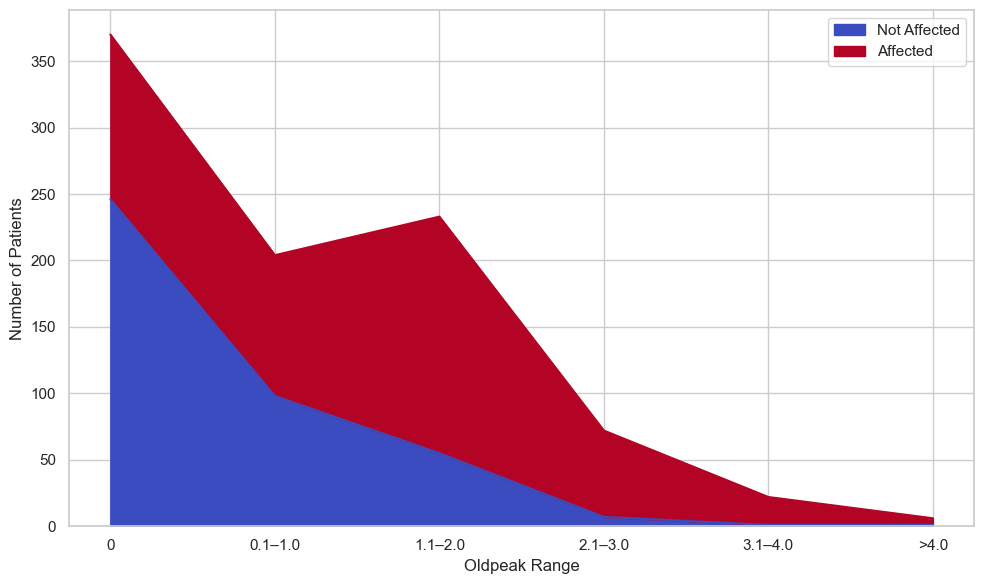

In [57]:
oldpeak_counts_plot = oldpeak_counts.copy()
oldpeak_counts_plot.index = oldpeak_counts_plot.index.astype(str)  # Ensure string labels

oldpeak_counts_plot[['Not Affected', 'Affected']].plot.area(
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm'
)
plt.xlabel("Oldpeak Range")
plt.ylabel("Number of Patients")
#plt.title("Stacked Area Plot of Heart Disease by Oldpeak")
plt.tight_layout()
plt.show()

#final

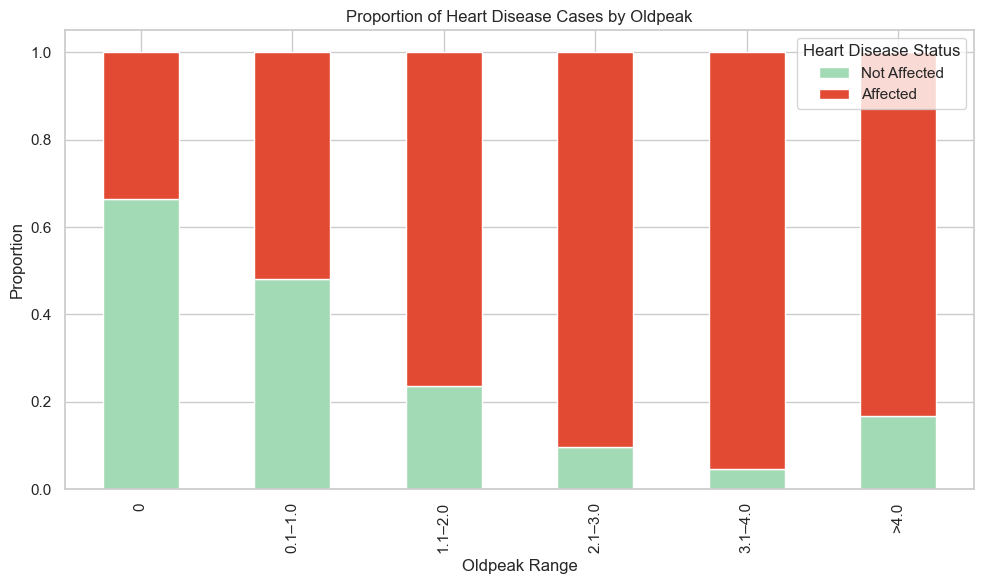

In [58]:
proportion = oldpeak_counts[['Not Affected', 'Affected']].div(oldpeak_counts['Total'], axis=0)

proportion.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#a1dab4', '#e34a33']
)

plt.ylabel("Proportion")
plt.xlabel("Oldpeak Range")
plt.title("Proportion of Heart Disease Cases by Oldpeak")
plt.legend(title="Heart Disease Status")
plt.tight_layout()
plt.show()


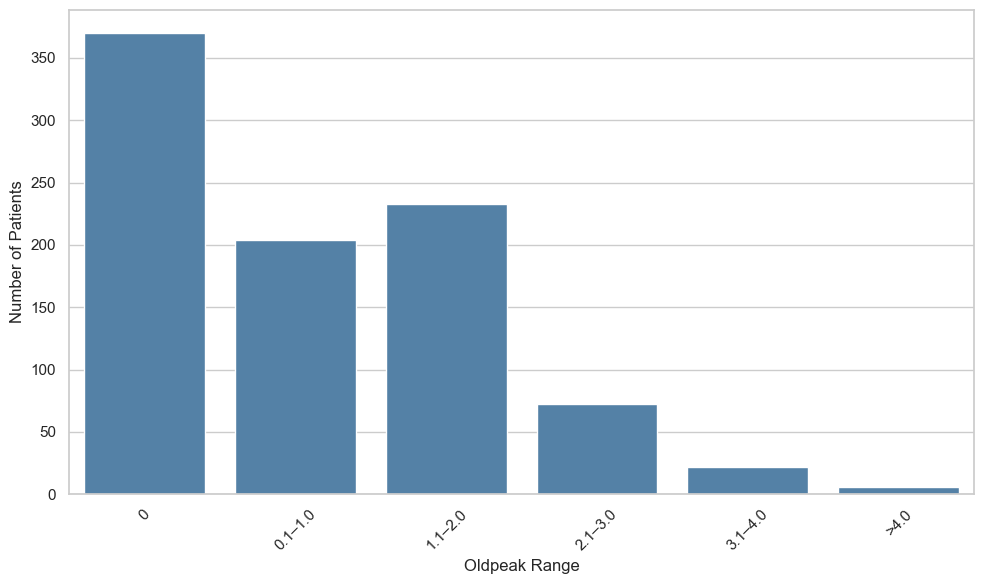

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plotting the total number of patients in each Oldpeak bin
plt.figure(figsize=(10, 6))
sns.barplot(
    x=oldpeak_counts.index,
    y=oldpeak_counts['Total'],
    color='steelblue'
)

plt.xlabel("Oldpeak Range")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Figure 6

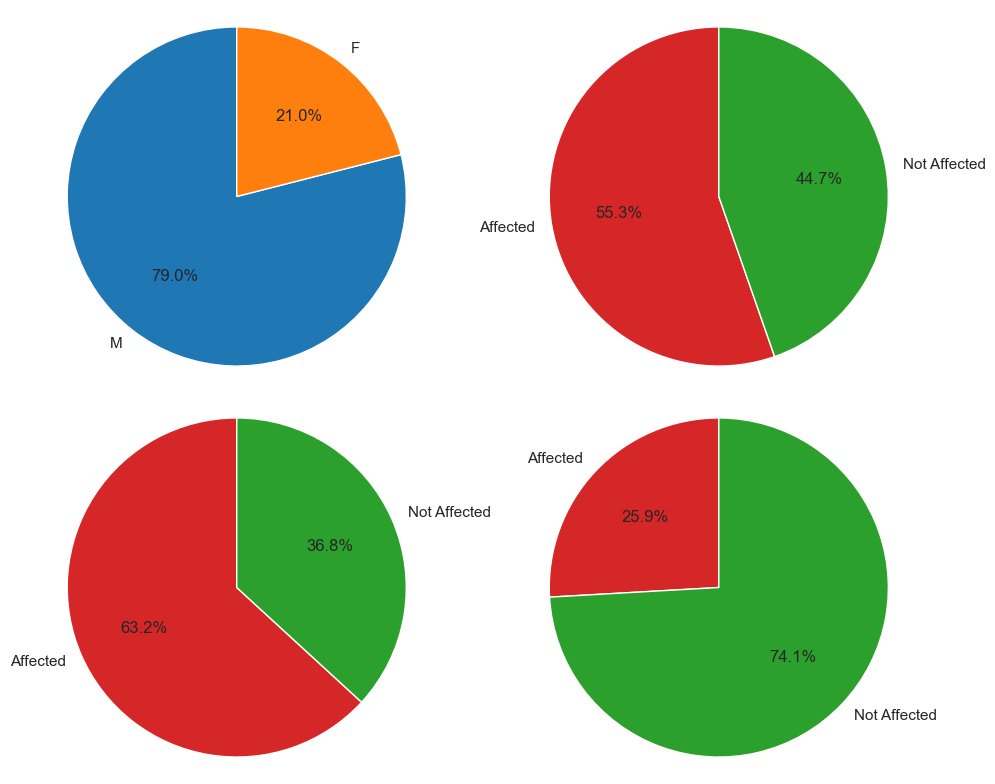

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure label is added
dt['HeartDisease_Label'] = dt['HeartDisease'].replace({1: 'Affected', 0: 'Not Affected'})

# Count distributions
total_sex = dt['Sex'].value_counts()
sex_hd = dt.groupby(['Sex', 'HeartDisease_Label']).size().unstack(fill_value=0)
total_hd = dt['HeartDisease_Label'].value_counts()

# Custom color schemes
sex_colors = ['#1f77b4', '#ff7f0e']   # Blue, Orange
hd_colors = ['#d62728', '#2ca02c']   # Green, Red

# Create 2×2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Pie 1: Total Sex Distribution
axes[0, 0].pie(total_sex.values, labels=total_sex.index, autopct='%1.1f%%', colors=sex_colors, startangle=90)
#axes[0, 0].set_title('Total Sex Distribution')
axes[0, 0].axis('equal')

# Pie 2: Total Heart Disease Status
axes[0, 1].pie(total_hd.values, labels=total_hd.index, autopct='%1.1f%%', colors=hd_colors, startangle=90)
#axes[0, 1].set_title('Total Heart Disease Status')
axes[0, 1].axis('equal')

# Pie 3: Male Heart Disease Status
male_data = sex_hd.loc['M']
axes[1, 0].pie(male_data, labels=male_data.index, autopct='%1.1f%%', colors=hd_colors, startangle=90)
#axes[1, 0].set_title('Male Heart Disease Status')
axes[1, 0].axis('equal')

# Pie 4: Female Heart Disease Status
female_data = sex_hd.loc['F']
axes[1, 1].pie(female_data, labels=female_data.index, autopct='%1.1f%%', colors=hd_colors, startangle=90)
#axes[1, 1].set_title('Female Heart Disease Status')
axes[1, 1].axis('equal')

plt.tight_layout()
plt.show()


## Figure 7

In [61]:
# Create label column if not already present
dt['HeartDisease_Label'] = dt['HeartDisease'].replace({1: 'Affected', 0: 'Not Affected'})

# Group by ChestPainType and HeartDisease_Label
summary = dt.groupby(['ChestPainType', 'HeartDisease_Label']).size().unstack(fill_value=0)

# Add total and percentage affected columns
summary['Total'] = summary['Affected'] + summary['Not Affected']
summary['% Affected'] = (summary['Affected'] / summary['Total'] * 100).round(1)

# Reorder columns
summary = summary[['Not Affected', 'Affected', 'Total', '% Affected']]

# Display
print(summary)


HeartDisease_Label  Not Affected  Affected  Total  % Affected
ChestPainType                                                
ASY                          104       392    496        79.0
ATA                          149        24    173        13.9
NAP                          131        72    203        35.5
TA                            26        20     46        43.5


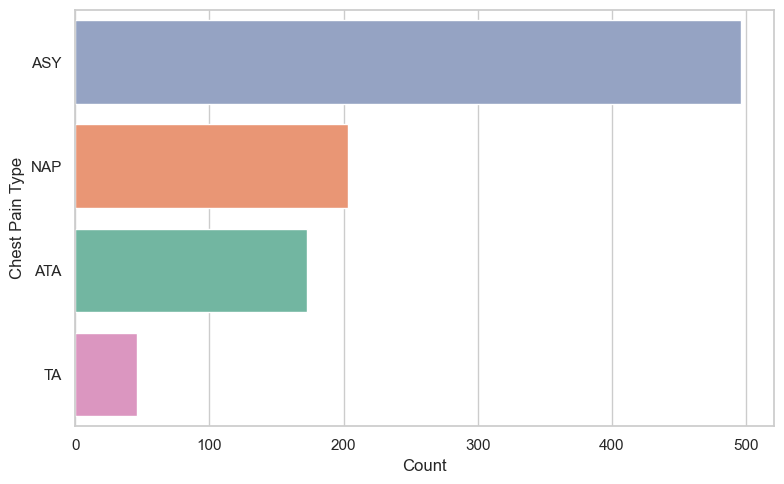

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(
    data=dt,
    y='ChestPainType',
    order=dt['ChestPainType'].value_counts().index,
    hue='ChestPainType',
    palette='Set2',
    legend=False
)

plt.xlabel("Count")
plt.ylabel("Chest Pain Type")
#plt.title("Distribution of Chest Pain Types")
plt.tight_layout()
plt.show()


## Figure 8

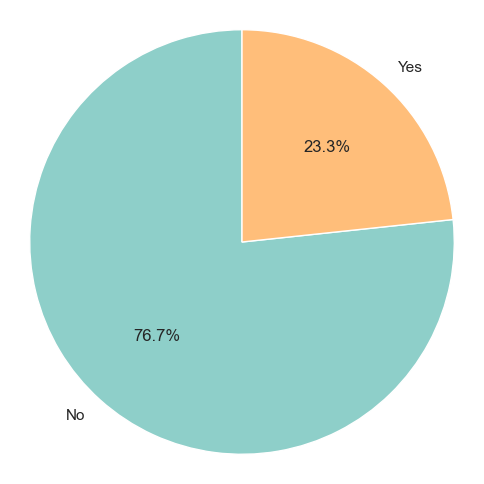

In [63]:
import matplotlib.pyplot as plt

# Count values for FastingBS
counts = dt['FastingBS'].value_counts().sort_index()

# Define labels based on binary values
labels = ['No', 'Yes']

# Plot as a full pie chart
plt.figure(figsize=(5,5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#8ecfc9', '#ffbe7a'])
plt.axis('equal')
plt.tight_layout()
plt.show()


In [64]:
dt['HeartDisease_Label'] = dt['HeartDisease'].replace({0: 'Not Affected', 1: 'Affected'})

# Create a summary table
summary = dt.groupby(['FastingBS', 'HeartDisease_Label']).size().unstack(fill_value=0)

# Add total and % affected columns
summary['Total'] = summary['Not Affected'] + summary['Affected']
summary['% Affected'] = (summary['Affected'] / summary['Total'] * 100).round(1)

# Rename index for clarity
summary.index = ['FastingBS = 0 (No)', 'FastingBS = 1 (Yes)']

# Display the table
print(summary)


HeartDisease_Label   Affected  Not Affected  Total  % Affected
FastingBS = 0 (No)        338           366    704        48.0
FastingBS = 1 (Yes)       170            44    214        79.4


In [65]:
# Create bar_data from your existing summary
bar_data = dt.groupby(['FastingBS', 'HeartDisease_Label']).size().unstack(fill_value=0)

# Optional: rename index for clarity if needed
bar_data.index = ['FastingBS = 0 (No)', 'FastingBS = 1 (Yes)']


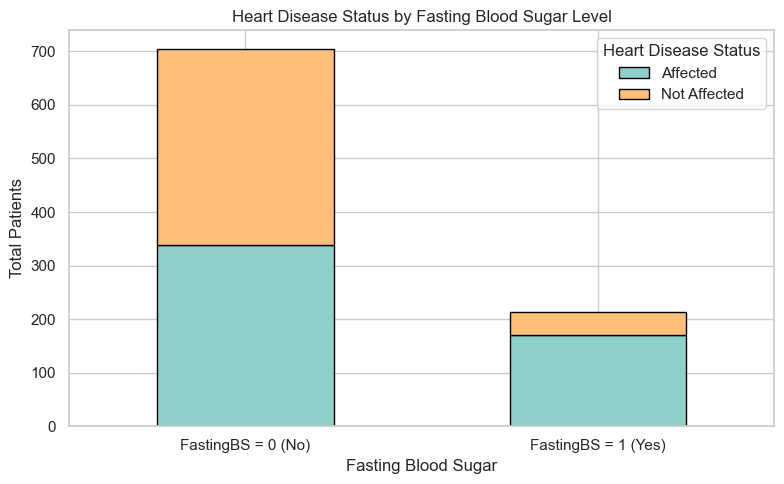

In [66]:
bar_data.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['#8ecfc9', '#ffbe7a'],
    edgecolor='black'
)

plt.title('Heart Disease Status by Fasting Blood Sugar Level')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total Patients')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease Status')
plt.tight_layout()
plt.show()
#final (percentage)

## Figure 9

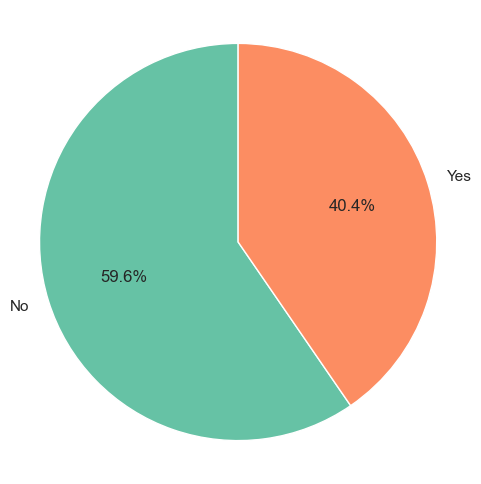

In [67]:
import matplotlib.pyplot as plt

# Ensure mapping for clarity
dt['ExerciseAngina_Label'] = dt['ExerciseAngina'].map({'N': 'No', 'Y': 'Yes'})

# Count distribution
angina_counts = dt['ExerciseAngina_Label'].value_counts()

# Plot pie chart
colors = ['#66c2a5', '#fc8d62']
plt.figure(figsize=(5, 5))
plt.pie(
    angina_counts.values,
    labels=angina_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
)
#plt.title("Distribution of Exercise-Induced Angina")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


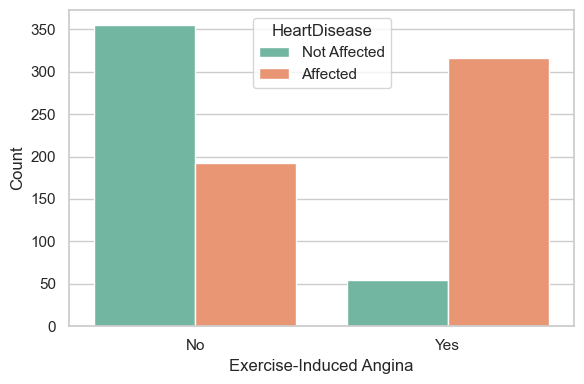

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map values for clarity if needed
dt['ExerciseAngina'] = dt['ExerciseAngina'].map({'N': 'No', 'Y': 'Yes'})
dt['HeartDisease'] = dt['HeartDisease'].map({0: 'Not Affected', 1: 'Affected'})

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=dt, x='ExerciseAngina', hue='HeartDisease', palette='Set2')
plt.xlabel("Exercise-Induced Angina")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#fianl

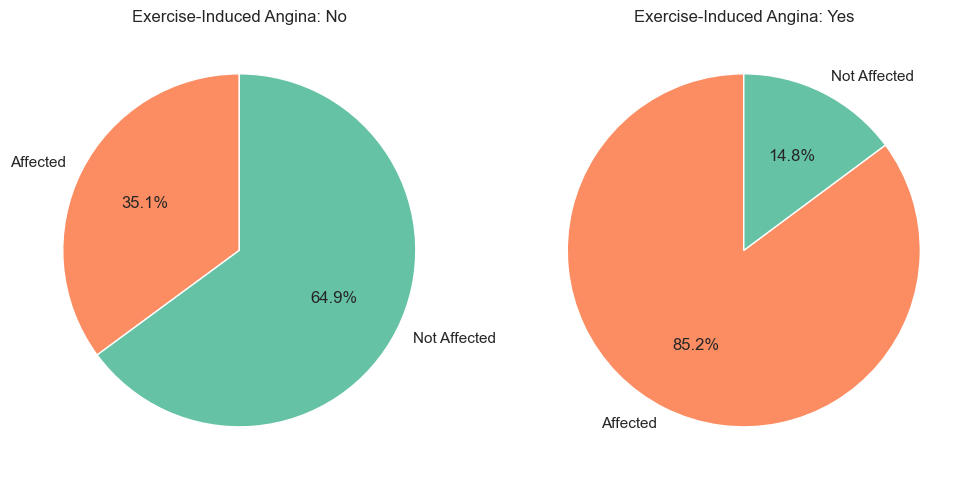

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure mapping is done BEFORE grouping
df['ExerciseAngina_Label'] = df['ExerciseAngina'].map({'N': 'No', 'Y': 'Yes'})
df['HeartDisease_Label'] = df['HeartDisease'].map({0: 'Not Affected', 1: 'Affected'})

# Group by mapped values
angina_groups = df.groupby('ExerciseAngina_Label')['HeartDisease_Label'].value_counts().unstack().fillna(0)

# Plot dual pie charts
colors = ['#fc8d62', '#66c2a5']
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, status in enumerate(['No', 'Yes']):
    data = angina_groups.loc[status]
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90
    )
    axes[i].set_title(f"Exercise-Induced Angina: {status}")

plt.tight_layout()
plt.show()


In [70]:
# Create contingency table
angina_table = dt.groupby(['ExerciseAngina', 'HeartDisease_Label']).size().unstack(fill_value=0)

# Add total and % affected
angina_table['Total'] = angina_table.sum(axis=1)
angina_table['% Affected'] = (angina_table['Affected'] / angina_table['Total'] * 100).round(1)

# Display table
print(angina_table)


HeartDisease_Label  Affected  Not Affected  Total  % Affected
ExerciseAngina                                               
No                       192           355    547        35.1
Yes                      316            55    371        85.2
